# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

I have used 15000 metropolis steps to equilibrate the system.

In [9]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

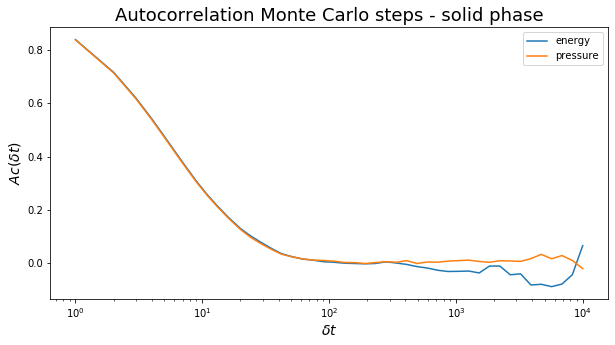

In [10]:
data_epot = np.loadtxt("07.1/all_epot_solid.dat")
data_pres = np.loadtxt("07.1/all_pres_solid.dat")

data_epot = data_epot/108

ave = np.mean(data_epot)
var = np.var(data_epot)

#autocorrelazione
autoc = []
deltas = np.logspace(start=0, stop=4)
for delta in deltas:
    delta = int(delta)
    sum = 0.0
    for i in range(len(data_epot)-delta-1):
        sum = sum + data_epot[i]*data_epot[i+delta]
    sum = sum / (len(data_epot)-delta-1)
    autoc.append([delta,(sum-ave*ave)/var])

autoc1 = np.array(autoc)

ave = np.mean(data_pres)
var = np.var(data_pres)

#autocorrelazione
autoc = []
deltas = np.logspace(start=0, stop=4)
for delta in deltas:
    delta = int(delta)
    sum = 0.0
    for i in range(len(data_pres)-delta-1):
        sum = sum + data_pres[i]*data_pres[i+delta]
    sum = sum / (len(data_pres)-delta-1)
    autoc.append([delta,(sum-ave*ave)/var])

autoc2 = np.array(autoc)

plt.figure(figsize=(10,5))
plt.plot(autoc1[:,0], autoc1[:,1], label = 'energy')
plt.plot(autoc2[:,0], autoc2[:,1], label = 'pressure')
plt.title("Autocorrelation Monte Carlo steps - solid phase", fontsize=18)
plt.xscale("log")
plt.xlabel(r'$ \delta t $', fontsize = 14)
plt.ylabel(r'$ Ac(\delta t) $', fontsize =14)
plt.legend()
plt.show()

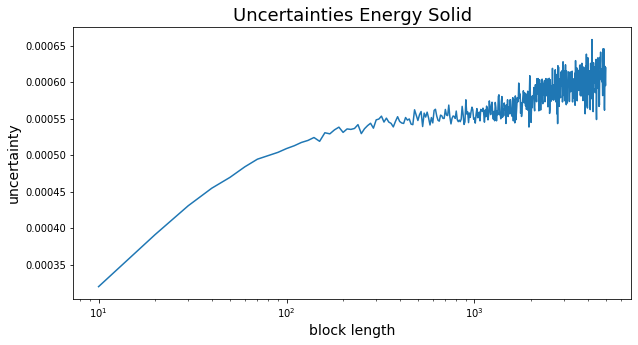

In [12]:
M = len(data_epot)
vec_L = np.arange(10,5001,10)

var = []

for L in vec_L:
    N=int(M/L)
    vec = np.zeros(N)
    
    k = 0
    
    for i in range(N):
        vec_appo = data_epot[i*L:(i+1)*L]
        vec[i] = np.mean(vec_appo)
    
    var.append([L,math.sqrt(np.var(vec)/(N-1))])
    
var =np.array(var)
plt.figure(figsize=(10,5))
plt.plot(var[:,0], var[:,1]) 
plt.title("Uncertainties Energy Solid", fontsize = 18)
plt.xlabel("block length", fontsize = 14)
plt.ylabel("uncertainty", fontsize = 14)
plt.xscale("log")
plt.show()

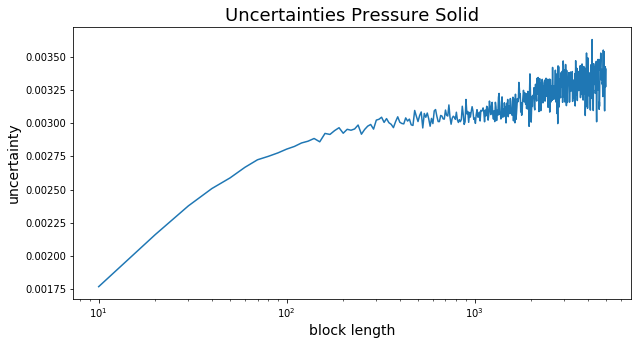

In [14]:
M = len(data_pres)
vec_L = np.arange(10,5001,10)

var = []

for L in vec_L:
    N=int(M/L)
    vec = np.zeros(N)
    
    k = 0
    
    for i in range(N):
        vec_appo = data_pres[i*L:(i+1)*L]
        vec[i] = np.mean(vec_appo)
    
    var.append([L,math.sqrt(np.var(vec)/(N-1))])
    
var =np.array(var)
plt.figure(figsize=(10,5))
plt.plot(var[:,0], var[:,1]) 
plt.title("Uncertainties Pressure Solid", fontsize = 18)
plt.xlabel("block length", fontsize = 14)
plt.ylabel("uncertainty", fontsize = 14)
plt.xscale("log")
plt.show()

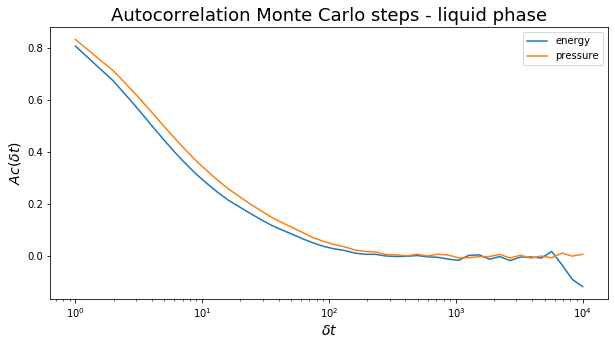

In [15]:
data_epot = np.loadtxt("07.1/all_epot_liquid.dat")
data_pres = np.loadtxt("07.1/all_pres_liquid.dat")

data_epot = data_epot/108

ave = np.mean(data_epot)
var = np.var(data_epot)

#autocorrelazione
autoc = []
deltas = np.logspace(start=0, stop=4)
for delta in deltas:
    delta = int(delta)
    sum = 0.0
    for i in range(len(data_epot)-delta-1):
        sum = sum + data_epot[i]*data_epot[i+delta]
    sum = sum / (len(data_epot)-delta-1)
    autoc.append([delta,(sum-ave*ave)/var])

autoc1 = np.array(autoc)

ave = np.mean(data_pres)
var = np.var(data_pres)

#autocorrelazione
autoc = []
deltas = np.logspace(start=0, stop=4)
for delta in deltas:
    delta = int(delta)
    sum = 0.0
    for i in range(len(data_pres)-delta-1):
        sum = sum + data_pres[i]*data_pres[i+delta]
    sum = sum / (len(data_pres)-delta-1)
    autoc.append([delta,(sum-ave*ave)/var])

autoc2 = np.array(autoc)

plt.figure(figsize=(10,5))
plt.plot(autoc1[:,0], autoc1[:,1], label = 'energy')
plt.plot(autoc2[:,0], autoc2[:,1], label = 'pressure')
plt.title("Autocorrelation Monte Carlo steps - liquid phase", fontsize=18)
plt.xscale("log")
plt.xlabel(r'$ \delta t $', fontsize = 14)
plt.ylabel(r'$ Ac(\delta t) $', fontsize =14)
plt.legend()
plt.show()

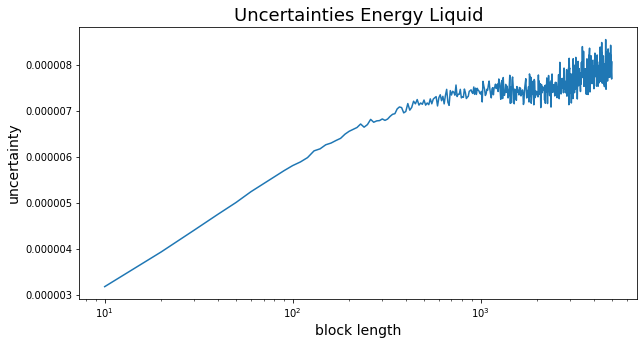

In [16]:
M = len(data_epot)
vec_L = np.arange(10,5001,10)

var = []

for L in vec_L:
    N=int(M/L)
    vec = np.zeros(N)
    
    k = 0
    
    for i in range(N):
        vec_appo = data_epot[i*L:(i+1)*L]
        vec[i] = np.mean(vec_appo)
    
    var.append([L,math.sqrt(np.var(vec)/(N-1))])
    
var =np.array(var)    
plt.figure(figsize=(10,5))
plt.plot(var[:,0], var[:,1]) 
plt.title("Uncertainties Energy Liquid", fontsize = 18)
plt.xlabel("block length", fontsize = 14)
plt.ylabel("uncertainty", fontsize = 14)
plt.xscale("log")
plt.show()

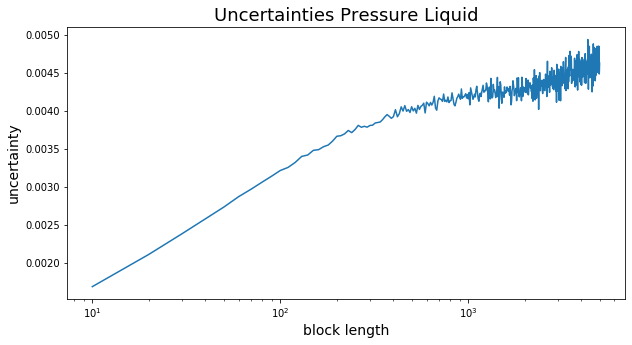

In [17]:
M = len(data_pres)
vec_L = np.arange(10,5001,10)

var = []

for L in vec_L:
    N=int(M/L)
    vec = np.zeros(N)
    
    k = 0
    
    for i in range(N):
        vec_appo = data_pres[i*L:(i+1)*L]
        vec[i] = np.mean(vec_appo)
    
    var.append([L,math.sqrt(np.var(vec)/(N-1))])
    
var =np.array(var)    

plt.figure(figsize=(10,5))
plt.plot(var[:,0], var[:,1]) 
plt.title("Uncertainties Pressure Liquid", fontsize = 18)
plt.xlabel("block length", fontsize = 14)
plt.ylabel("uncertainty", fontsize = 14)
plt.xscale("log")
plt.show()

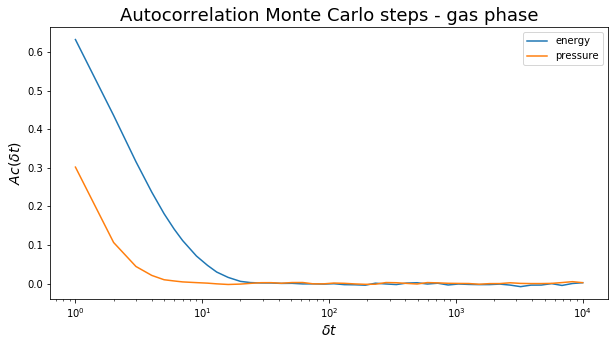

In [19]:
data_epot = np.loadtxt("07.1/all_epot_gas.dat")
data_pres = np.loadtxt("07.1/all_pres_gas.dat")

data_epot = data_epot/108

ave = np.mean(data_epot)
var = np.var(data_epot)

#autocorrelazione
autoc = []
deltas = np.logspace(start=0, stop=4)
for delta in deltas:
    delta = int(delta)
    sum = 0.0
    for i in range(len(data_epot)-delta-1):
        sum = sum + data_epot[i]*data_epot[i+delta]
    sum = sum / (len(data_epot)-delta-1)
    autoc.append([delta,(sum-ave*ave)/var])

autoc1 = np.array(autoc)

ave = np.mean(data_pres)
var = np.var(data_pres)

#autocorrelazione
autoc = []
deltas = np.logspace(start=0, stop=4)
for delta in deltas:
    delta = int(delta)
    sum = 0.0
    for i in range(len(data_pres)-delta-1):
        sum = sum + data_pres[i]*data_pres[i+delta]
    sum = sum / (len(data_pres)-delta-1)
    autoc.append([delta,(sum-ave*ave)/var])

autoc2 = np.array(autoc)

plt.figure(figsize=(10,5))
plt.plot(autoc1[:,0], autoc1[:,1], label = 'energy')
plt.plot(autoc2[:,0], autoc2[:,1], label = 'pressure')
plt.title("Autocorrelation Monte Carlo steps - gas phase", fontsize=18)
plt.xscale("log")
plt.xlabel(r'$ \delta t $', fontsize = 14)
plt.ylabel(r'$ Ac(\delta t) $', fontsize =14)
plt.legend()
plt.show()

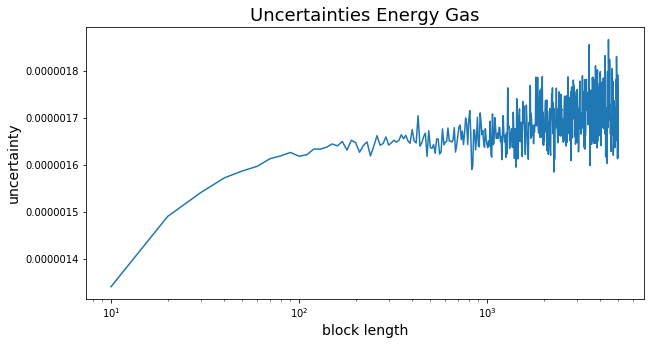

In [21]:
M = len(data_epot)
vec_L = np.arange(10,5001,10)

var = []

for L in vec_L:
    N=int(M/L)
    vec = np.zeros(N)
    
    k = 0
    
    for i in range(N):
        vec_appo = data_epot[i*L:(i+1)*L]
        vec[i] = np.mean(vec_appo)
    
    var.append([L,math.sqrt(np.var(vec)/(N-1))])
    
var =np.array(var)    
plt.figure(figsize=(10,5))
plt.plot(var[:,0], var[:,1]) 
plt.title("Uncertainties Energy Gas", fontsize = 18)
plt.xlabel("block length", fontsize = 14)
plt.ylabel("uncertainty", fontsize = 14)
plt.xscale("log")
plt.show()

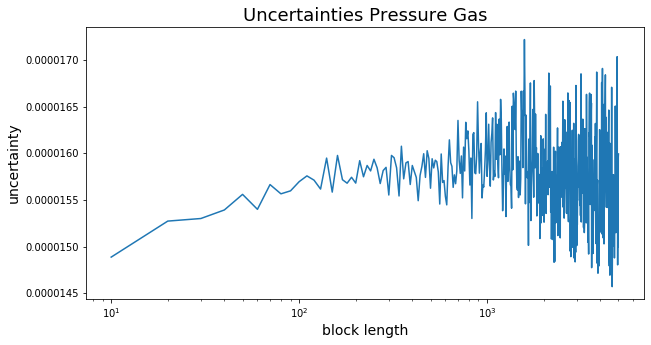

In [22]:
M = len(data_pres)
vec_L = np.arange(10,5001,10)

var = []

for L in vec_L:
    N=int(M/L)
    vec = np.zeros(N)
    
    k = 0
    
    for i in range(N):
        vec_appo = data_pres[i*L:(i+1)*L]
        vec[i] = np.mean(vec_appo)
    
    var.append([L,math.sqrt(np.var(vec)/(N-1))])
    
var =np.array(var)    
plt.figure(figsize=(10,5))
plt.plot(var[:,0], var[:,1]) 
plt.title("Uncertainties Pressure Gas", fontsize = 18)
plt.xlabel("block length", fontsize = 14)
plt.ylabel("uncertainty", fontsize = 14)
plt.xscale("log")
plt.show()

The blocks in the simulation should be of between $10 ^2 $ and $10^3$ steps, therefore between these two values the autocorrelation of energy and pressure approach the zero.
The trend of the uncertainties with the block length has an approximate plateau in the region between $10^2$ and $10^3$, then It oscillates more and more with the length. This may be caused by the decreasing number of blocks available to calculate uncertainties.

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)


show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

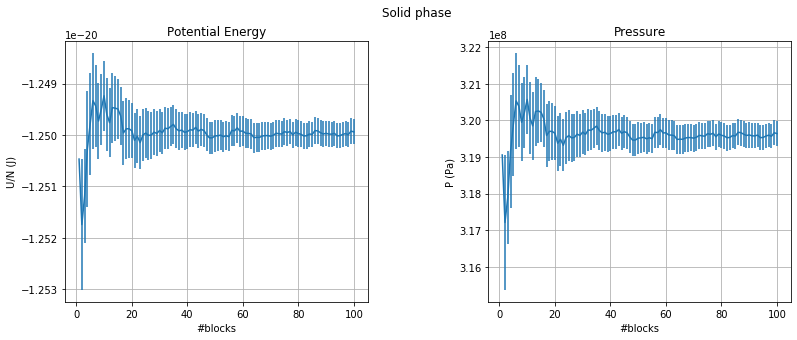

In [3]:
sigma = 0.34e-9
T = 120
m = 39.948*1.66e-27
k = 1.38e-23
V = sigma **3

data_epot = np.loadtxt("07.4/epot.solid.dat")
data_pres = np.loadtxt("07.4/pres.solid.dat")

fig, axs = plt.subplots(nrows=1, ncols=2, sharex= True, figsize =(13,4.8))

ax = axs[0]
ax.errorbar(data_epot[:,0], k*T*data_epot[:,2], yerr = k*T*data_epot[:,3])
ax.set_title("Potential Energy")
ax.set_xlabel("#blocks")
ax.set_ylabel('U/N (J)')
ax.grid(True)

ax = axs[1]
ax.errorbar(data_pres[:,0], k*T*data_pres[:,2]/V, yerr = k*T*data_pres[:,3]/V)
ax.set_title("Pressure")
ax.set_xlabel("#blocks")
ax.set_ylabel('P (Pa)')
ax.grid(True)

fig.suptitle("Solid phase")

plt.subplots_adjust(hspace =0.4, wspace =0.4)

plt.show()

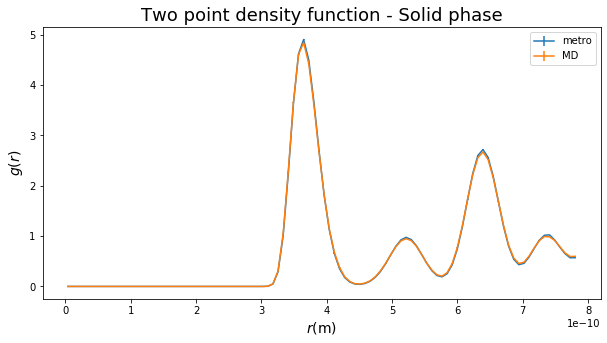

In [4]:
data_metro = np.loadtxt("07.4/gave.solid.dat")
data_md = np.loadtxt("MolecularDynamics_NVE/results/solid_gave.out")

plt.figure(figsize=(10,5))
plt.errorbar(sigma*data_metro[:,0], data_metro[:,1], yerr = data_metro[:,2], label = 'metro')
plt.errorbar(sigma*data_md[:,0], data_md[:,1], yerr = data_md[:,2], label = 'MD')
plt.title("Two point density function - Solid phase", fontsize=18)
plt.xlabel(r'$ r $(m)', fontsize=14)
plt.ylabel(r'$ g(r) $', fontsize=14)
plt.legend()
plt.show()

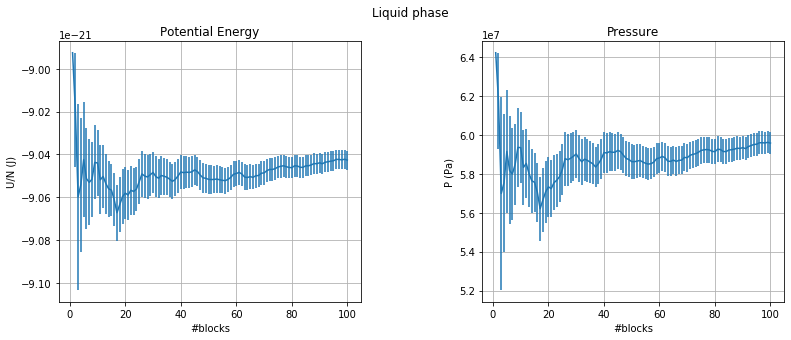

In [5]:
data_epot = np.loadtxt("07.4/epot.liquid.dat")
data_pres = np.loadtxt("07.4/pres.liquid.dat")

fig, axs = plt.subplots(nrows=1, ncols=2, sharex= True, figsize =(13,4.8))

ax = axs[0]
ax.errorbar(data_epot[:,0], k*T*data_epot[:,2], yerr = k*T*data_epot[:,3])
ax.set_title("Potential Energy")
ax.set_xlabel("#blocks")
ax.set_ylabel('U/N (J)')
ax.grid(True)

ax = axs[1]
ax.errorbar(data_pres[:,0], k*T*data_pres[:,2]/V, yerr = k*T*data_pres[:,3]/V)
ax.set_title("Pressure")
ax.set_xlabel("#blocks")
ax.set_ylabel('P (Pa)')
ax.grid(True)

fig.suptitle("Liquid phase")

plt.subplots_adjust(hspace =0.4, wspace =0.4)

plt.show()

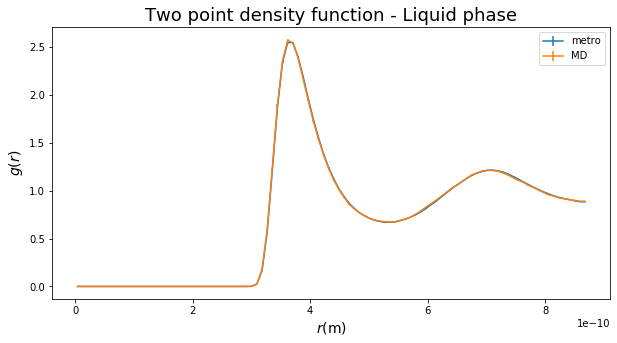

In [6]:
data_metro = np.loadtxt("07.4/gave.liquid.dat")
data_md = np.loadtxt("MolecularDynamics_NVE/results/liquid_gave.out")

sigma = 0.34e-9

plt.figure(figsize=(10,5))
plt.errorbar(sigma*data_metro[:,0], data_metro[:,1], yerr = data_metro[:,2], label = 'metro')
plt.errorbar(sigma*data_md[:,0], data_md[:,1], yerr = data_md[:,2], label = 'MD')
plt.title("Two point density function - Liquid phase", fontsize=18)
plt.xlabel(r'$ r $(m)', fontsize=14)
plt.ylabel(r'$ g(r) $', fontsize=14)
plt.legend()
plt.show()

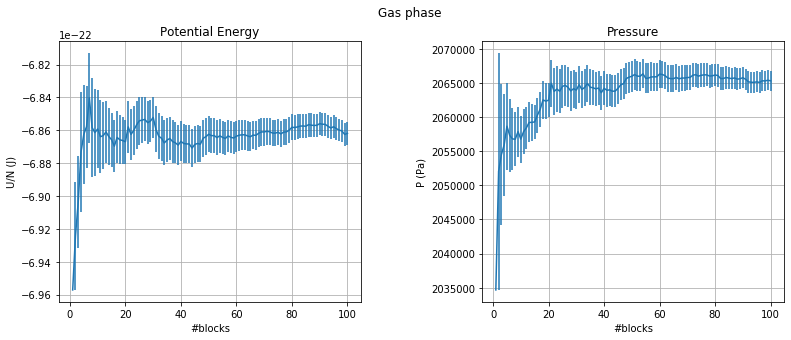

In [7]:
data_epot = np.loadtxt("07/07.4/epot.gas.dat")
data_pres = np.loadtxt("07/07.4/pres.gas.dat")

fig, axs = plt.subplots(nrows=1, ncols=2, sharex= True, figsize =(13,4.8))

ax = axs[0]
ax.errorbar(data_epot[:,0], k*T*data_epot[:,2], yerr = k*T*data_epot[:,3])
ax.set_title("Potential Energy")
ax.set_xlabel("#blocks")
ax.set_ylabel('U/N (J)')
ax.grid(True)

ax = axs[1]
ax.errorbar(data_pres[:,0], k*T*data_pres[:,2]/V, yerr = k*T*data_pres[:,3]/V)
ax.set_title("Pressure")
ax.set_xlabel("#blocks")
ax.set_ylabel('P (Pa)')
ax.grid(True)

fig.suptitle("Gas phase")

plt.subplots_adjust(hspace =0.4, wspace =0.4)

plt.show()

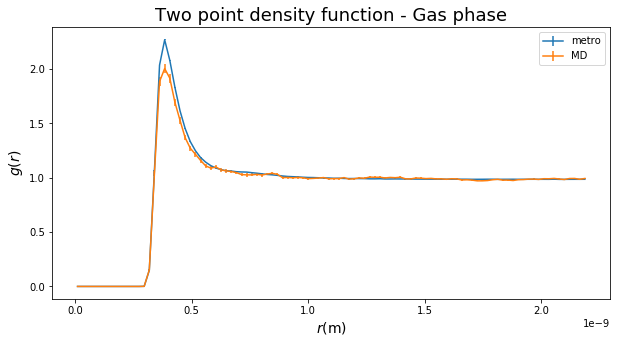

In [8]:
data_metro = np.loadtxt("07.4/gave.gas.dat")
data_md = np.loadtxt("MolecularDynamics_NVE/results/gas_gave.out")

sigma = 0.34e-9

plt.figure(figsize=(10,5))
plt.errorbar(sigma*data_metro[:,0], data_metro[:,1], yerr = data_metro[:,2], label = 'metro')
plt.errorbar(sigma*data_md[:,0], data_md[:,1], yerr = data_md[:,2], label = 'MD')
plt.title("Two point density function - Gas phase", fontsize=18)
plt.xlabel(r'$ r $(m)', fontsize=14)
plt.ylabel(r'$ g(r) $', fontsize=14)
plt.legend()
plt.show()

The comparison between the two point density function given by the Verlet algorithm and the Metropolis algorithm shows that there is compatibilty everywhere except for the peak in the gas phase. I tried to use longer blocks (made of 10000 steps instead of 500) but the uncompatibility remained. 